#### Jacob:

**Question:**
How do player salaries compare with their performance? Does position matter? Is there a category of stats correlate the most with the salary?

Performance being defined by following key performance indicators:

- Points (PTS)
- Rebounds (REB)
- Assists (AST)
- Steals (STL)
- Blocks (BLK)
- Turnovers (TOV)
- True Shooting Pecentage (TS%)
- Player Efficiency Rating (PER)


**Analysis & Visualization Techniques:**

- Boxplots to show salary distributions
- Correlation heatmaps

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stats_path = "data/stats.csv"
salaries_path = "data/salaries.csv"

stats_original_df = pd.read_csv(stats_path, low_memory=False)
salaries_original_df = pd.read_csv(salaries_path, low_memory=False)

### Cleaning and Parsing the Data

In [3]:
# salaries_original_df.dropna().to_csv("data/salaries.csv")

In [4]:
stats_df = stats_original_df[['year', 'player', 'pos', 'team', 'PTS', 'BLK', 'AST', 'TOV', 'STL', 'TS%', 'PER']]

salaries_df = salaries_original_df[['name', ' Salary in $ ', 'season_start', 'season_end', 'team']]
salaries_df = salaries_df.rename(columns={' Salary in $ ': 'salary', 'name': 'player'})
salaries_df

,player,salary,season_start,season_end,team
0,A.J. Hammons,"$650,000.00",2016.0,2017.0,DAL
1,A.J. Hammons,"$1,312,611.00",2017.0,2018.0,MIA
2,A.J. Price,"$457,588.00",2009.0,2010.0,IND
3,A.J. Price,"$762,195.00",2010.0,2011.0,IND
4,A.J. Price,"$854,389.00",2011.0,2012.0,IND
...,...,...,...,...,...
5174,Zoran Dragic,"$1,962,103.00",2014.0,2015.0,MIA
5175,Zoran Dragic,"$2,050,397.00",2015.0,2016.0,BOS
5176,Zydrunas Ilgauskas,"$10,142,156.00",2007.0,2008.0,CLE
5177,Zydrunas Ilgauskas,"$10,841,615.00",2008.0,2009.0,CLE


In [5]:
salaries_df['salary'] = salaries_df['salary'].str.strip().replace({'\$': '', ',': ''}, regex=True).astype(float)

In [6]:
stats_df = stats_df.dropna().drop_duplicates()
salaries_df = salaries_df.dropna().drop_duplicates()

In [7]:
players = stats_df['player'].unique()
salaries_df = salaries_df.loc[salaries_df['player'].isin(players)]

In [8]:
stats_df.head()

,year,player,pos,team,PTS,BLK,AST,TOV,STL,TS%,PER
0,2007,Shareef Abdur-Rahim,C,SAC,793,40,109,116,53,0.524,13.1
1,2007,Hassan Adams,SG,NJN,174,4,13,22,17,0.577,13.0
2,2007,Maurice Ager,SG,DAL,69,3,7,15,4,0.408,2.9
3,2007,LaMarcus Aldridge,C,POR,565,73,24,43,22,0.533,17.1
4,2007,Malik Allen,PF,CHI,242,16,16,21,17,0.443,10.4


In [9]:
salaries_df.head()

,player,salary,season_start,season_end,team
0,A.J. Hammons,650000.0,2016.0,2017.0,DAL
1,A.J. Hammons,1312611.0,2017.0,2018.0,MIA
2,A.J. Price,457588.0,2009.0,2010.0,IND
3,A.J. Price,762195.0,2010.0,2011.0,IND
4,A.J. Price,854389.0,2011.0,2012.0,IND


### Merging the dataframes

In [10]:
stats_and_salaries_df = stats_df.merge(salaries_df.rename(columns={'season_end': 'year'}), on=['player', 'year', 'team'])
stats_and_salaries_df = stats_and_salaries_df.dropna()

stats_and_salaries_df = stats_and_salaries_df.sort_values(by='year')
stats_and_salaries_df = stats_and_salaries_df[['player', 'pos', 'team', 'PTS', 'BLK', 'AST', 'TOV', 'STL', 'TS%', 'PER', 'salary']]

stats_and_salaries_df.head()

,player,pos,team,PTS,BLK,AST,TOV,STL,TS%,PER,salary
0,Arron Afflalo,SG,DET,276,8,52,34,31,0.494,10.2,944520.0
238,Bo Outlaw,PF,ORL,4,0,0,1,0,0.667,8.6,160071.0
237,Mehmet Okur,C,UTA,1047,29,145,104,55,0.556,15.2,8500000.0
236,Lamar Odom,PF,LAL,1094,72,273,156,75,0.582,16.9,13248596.0
235,Fabricio Oberto,PF,SAS,397,20,95,51,37,0.615,13.8,3600000.0


### A Feel for NBA Player Salaries

In [11]:
salaries_groupby_year = salaries_df.groupby('season_end')
max_salaries_by_year = salaries_groupby_year.agg({'salary': 'max'})
min_salaries_by_year = salaries_groupby_year.agg({'salary': 'min'})
max_salaries_by_year, min_salaries_by_year

(                salary
 season_end            
 2008.0      19728000.0
 2009.0      24751934.0
 2010.0      23239562.0
 2011.0      24806250.0
 2012.0      25244493.0
 2013.0      27849149.0
 2014.0      30453805.0
 2015.0      23500000.0
 2016.0      25000000.0
 2017.0      30963450.0
 2018.0      34682550.0,
               salary
 season_end          
 2008.0       12890.0
 2009.0       26007.0
 2010.0       26917.0
 2011.0       27859.0
 2012.0       38172.0
 2013.0       23852.0
 2014.0      100000.0
 2015.0       19914.0
 2016.0        8819.0
 2017.0        5145.0
 2018.0       17224.0)

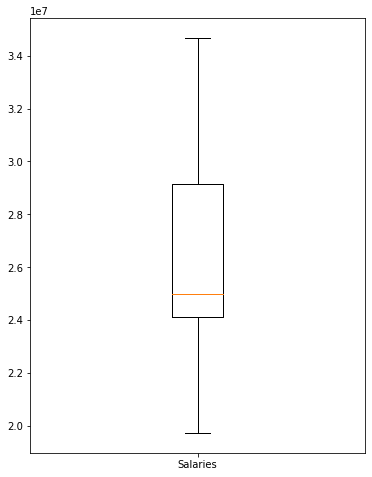

In [12]:
plt.figure(figsize=(6, 8))
plt.boxplot(max_salaries_by_year, labels=['Salaries'])
plt.show()

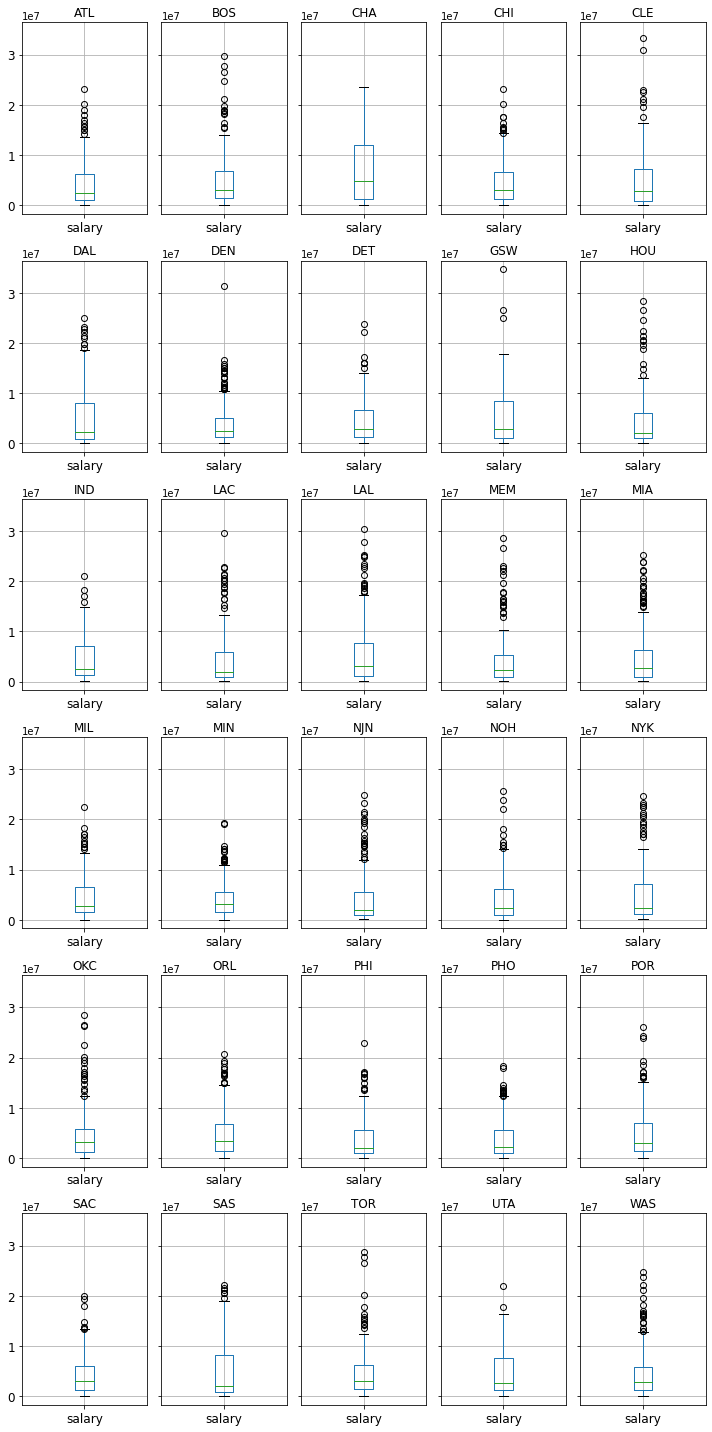

In [13]:
salaries_df_groupby_team = salaries_df[['salary', 'team']].groupby('team')
salaries_df_groupby_team.boxplot(fontsize=12, figsize=(10, 20))
plt.tight_layout()

### Looking for correlations

In [14]:
stats_and_salaries_df_groupby_player_team = stats_and_salaries_df.groupby(['player', 'team'])
stats_and_salaries_df_groupby_player_pos = stats_and_salaries_df.groupby(['player', 'pos'])
stats_and_salaries_df_groupby_player = stats_and_salaries_df.groupby(['player'])

In [15]:
average_player_team = stats_and_salaries_df_groupby_player_team.mean()
average_player_pos = stats_and_salaries_df_groupby_player_pos.mean()
average_player = stats_and_salaries_df_groupby_player.mean()

### Correlations grouping by player and team

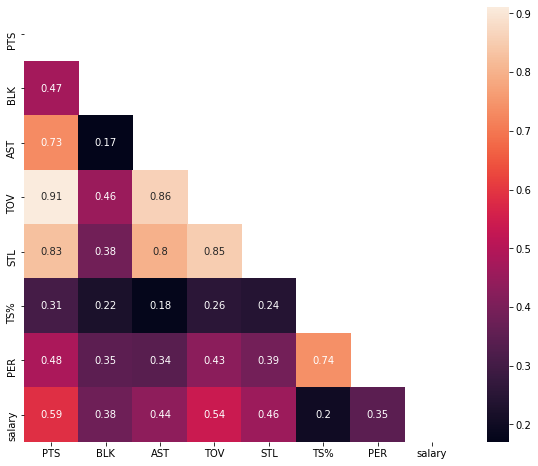

In [18]:
average_player_team_corr = average_player_team.corr(method='pearson')

mask = np.zeros_like(average_player_team_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(average_player_team_corr, annot=True, mask=mask, square=True)
plt.show()

### Correlations grouping by player and pos

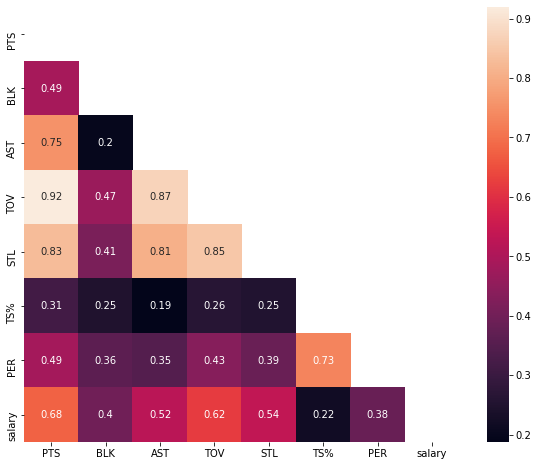

In [19]:
average_player_pos_corr = average_player_pos.corr(method='pearson')

mask = np.zeros_like(average_player_pos_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(average_player_pos_corr, annot=True, mask=mask, square=True)
plt.show()

### Correlations grouping by player

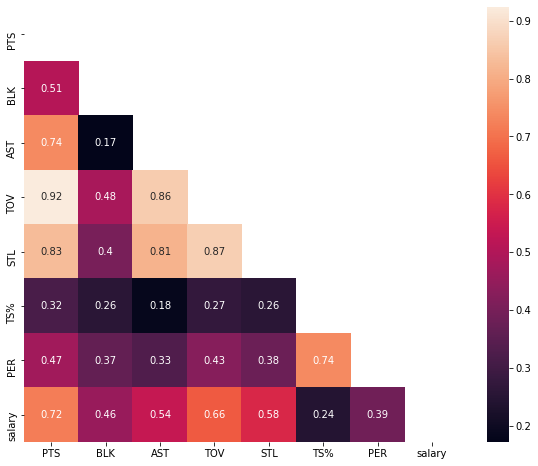

In [20]:
average_player_corr = average_player.corr(method='pearson')

mask = np.zeros_like(average_player_corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(average_player_corr, annot=True, mask=mask, square=True)
plt.show()